In [155]:
import matplotlib.pyplot as plt
import numpy as np
from perlin_noise import PerlinNoise
from scipy.integrate import solve_ivp

In [156]:
global Scale,AbunMatrix,Eta,Connec,Kappa,Abun0,mu0,mu1,D

In [157]:
def Arr2Posi(num,y):
    a=np.mod(y,num)
    b=int((y-a)/num)
    return [a,b]

In [158]:
def Posi2Arr(num,a,b):
    return a+b*num

In [159]:
def Dis(num,x,index):
    y=np.zeros(len(x))
    AA=Arr2Posi(num,index)
    for i in range(len(x)):
        BB=Arr2Posi(num,x[i])
        y[i]=np.sqrt((AA[0]-BB[0])**2+(AA[1]-BB[1])**2)
    return y

In [160]:
def Nearby(num,y):
    A=[]
    [a,b]=Arr2Posi(num,y)
    if a>0:
        A.append(Posi2Arr(num,a-1,b))
    if a<num-1:
        A.append(Posi2Arr(num,a+1,b))
    if b>0:
        A.append(Posi2Arr(num,a,b-1))
    if b<num-1:
        A.append(Posi2Arr(num,a,b+1))
    return A

In [161]:
def ARG_Move(t,y):
    dydt=np.zeros((Scale**2)*2)
    for i in range(Scale**2):
        aa=Arr2Posi(Scale,i)
        bb=Nearby(Scale,i)
        ss0=0
        ss1=0
        for j in range(len(bb)):
            ss0=ss0+y[bb[j]]
            ss1=ss1+y[bb[j]+Scale**2]
        if AbunMatrix[aa[0],aa[1]]==0:
            dydt[i]=0
            dydt[i+Scale**2]=0
        else:
            dydt[i]=mu0*y[i]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])-Eta*y[i]*(y[i+Scale**2]+Connec*ss1)+Kappa*y[i+Scale**2]-D*y[i]
            dydt[i+Scale**2]=mu1*y[i+Scale**2]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])+Eta*y[i]*(y[i+Scale**2]+Connec*ss1)-Kappa*y[i+Scale**2]-D*y[i+Scale**2]
    return dydt

In [162]:
Scale=21
Etas=np.arange(-4,-0.8,0.1)
Kappa=0.005
mu1=0.45
D=0.2

Connec=0.04
Abun0=0.5
mu0=0.5

Center=int((Scale-1)/2)
timespan=np.arange(0,800,1)

SSs=[0,5,15]
BBB=np.zeros((len(Etas),len(SSs)))

for qwe in range(len(Etas)):
    print(qwe)
    Eta=1/10**(-Etas[qwe])
    for ghj in range(len(SSs)):
        print(ghj)
        SS=SSs[ghj]
        noise = PerlinNoise(octaves=5, seed=3)
        xpix, ypix = Scale, Scale
        pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]
        if SS==0:
            land=np.ones((Scale,Scale))
        else:
            land=(np.abs(pic))**SS
            land=0.001+(land-np.min(land))/(np.max(land)-np.min(land))*0.999
        AbunMatrix=land/np.sum(land)*Scale**2
        land_p=[]
        for x in AbunMatrix.flatten():
            if x>0:
                land_p.append(x)
        temp=land_p/sum(land_p)

        InitialM=Abun0*AbunMatrix
        Initial=np.concatenate((AbunMatrix.flatten(),InitialM.flatten()),axis=0)
        sol=solve_ivp(ARG_Move,[0,max(timespan)],Initial,method='RK23',t_eval=timespan)
        y1=sol.y
        t1=sol.t

        tpoint=len(t1)-1
        BBB[qwe,ghj]=np.mean(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint])/(np.mean(y1[np.arange(0,Scale**2,1),tpoint])+np.mean(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint]))

0
0
1
2
1
0
1
2
2
0
1
2
3
0
1
2
4
0
1
2
5
0
1
2
6
0
1
2
7
0
1
2
8
0
1
2
9
0
1
2
10
0
1
2
11
0
1
2
12
0
1
2
13
0
1
2
14
0
1
2
15
0
1
2
16
0
1
2
17
0
1
2
18
0
1
2
19
0
1
2
20
0
1
2
21
0
1
2
22
0
1
2
23
0
1
2
24
0
1
2
25
0
1
2
26
0
1
2
27
0
1
2
28
0
1
2
29
0
1
2
30
0
1
2
31
0
1
2


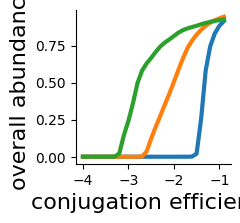

In [172]:
plt.figure(figsize=(2,2))
for i in range(len(SSs)):
    plt.plot(Etas,BBB[:,i],'-',linewidth=3)
plt.xlabel('conjugation efficiency',fontsize=16)
plt.ylabel('overall abundance',fontsize=16)
plt.xticks([-4,-3,-2,-1])
plt.tick_params(direction='out',top=False,right=False)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('EtaAbundance.pdf')
plt.show()